### Sales Prediction

In the provided advertising dataset, there are three independent variables (also known as features or predictors) and one dependent variable (also known as the target variable).

The independent variables are:

TV: This represents the amount of money spent on TV advertising in thousands of dollars. It indicates the advertising budget allocated to television commercials.

Radio: This represents the amount of money spent on radio advertising in thousands of dollars. It indicates the advertising budget allocated to radio commercials.

Newspaper: This represents the amount of money spent on newspaper advertising in thousands of dollars. It indicates the advertising budget allocated to newspaper advertisements.

The dependent variable is:

Sales: This represents the sales generated in thousands of units. It is the target variable that we want to predict based on the independent variables.
The goal of building a predictive model using this dataset is to understand the relationship between the advertising budgets allocated to different platforms (TV, radio, and newspaper) and the resulting sales. The model will learn from the historical data to make predictions about the sales based on the advertising budgets.

By analyzing the relationship between the independent variables (TV, radio, and newspaper) and the dependent variable (sales), the model will be able to identify which advertising platforms have a stronger impact on sales. It will provide insights into how changes in advertising budgets across different platforms can potentially influence the sales performance.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

In [144]:
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\advertising.csv")

In [145]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [146]:
df.shape

(200, 4)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [148]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### EDA

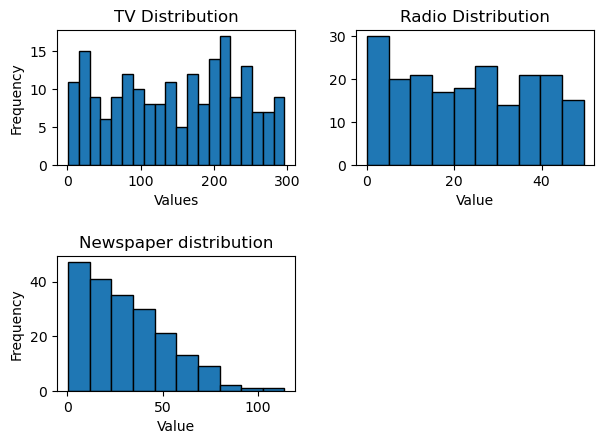

In [149]:
plt.subplot(2, 2, 1)
plt.hist(x='TV',data=df,bins=20, edgecolor='black')
plt.title('TV Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(x='Radio',data=df, edgecolor='black')
plt.title('Radio Distribution')
plt.xlabel('Value')

plt.subplot(2, 2, 3)
plt.hist(x='Newspaper',data=df,edgecolor='black')
plt.title('Newspaper distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout(pad=2.0)



### Observation
As we can observe the above plots the money invested on the  platform which are the Tv's and Radio's and Newspapers like how the plot is distributed of each histplot based on there amount 

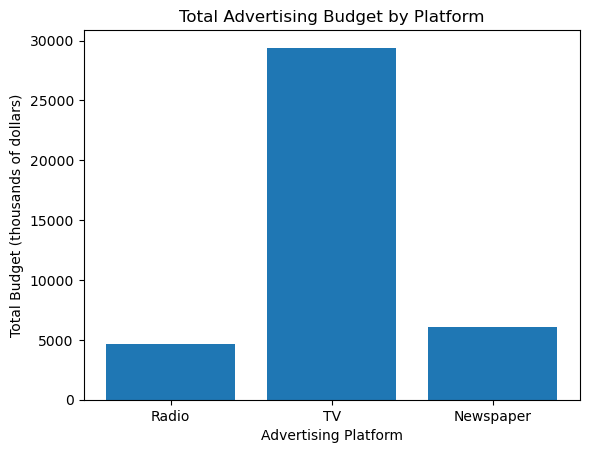

In [150]:
x=df['Radio'].sum()
y=df['TV'].sum()
z=df['Newspaper'].sum()

plt.bar(['Radio','TV','Newspaper'],[x,y,z])
plt.xlabel('Advertising Platform')
plt.ylabel('Total Budget (thousands of dollars)')
plt.title('Total Advertising Budget by Platform')

# Display the plot
plt.show()


Observation
1. Mostly the amount spent on the TV>Newspaper>Radio for increasing a sales performance on the product


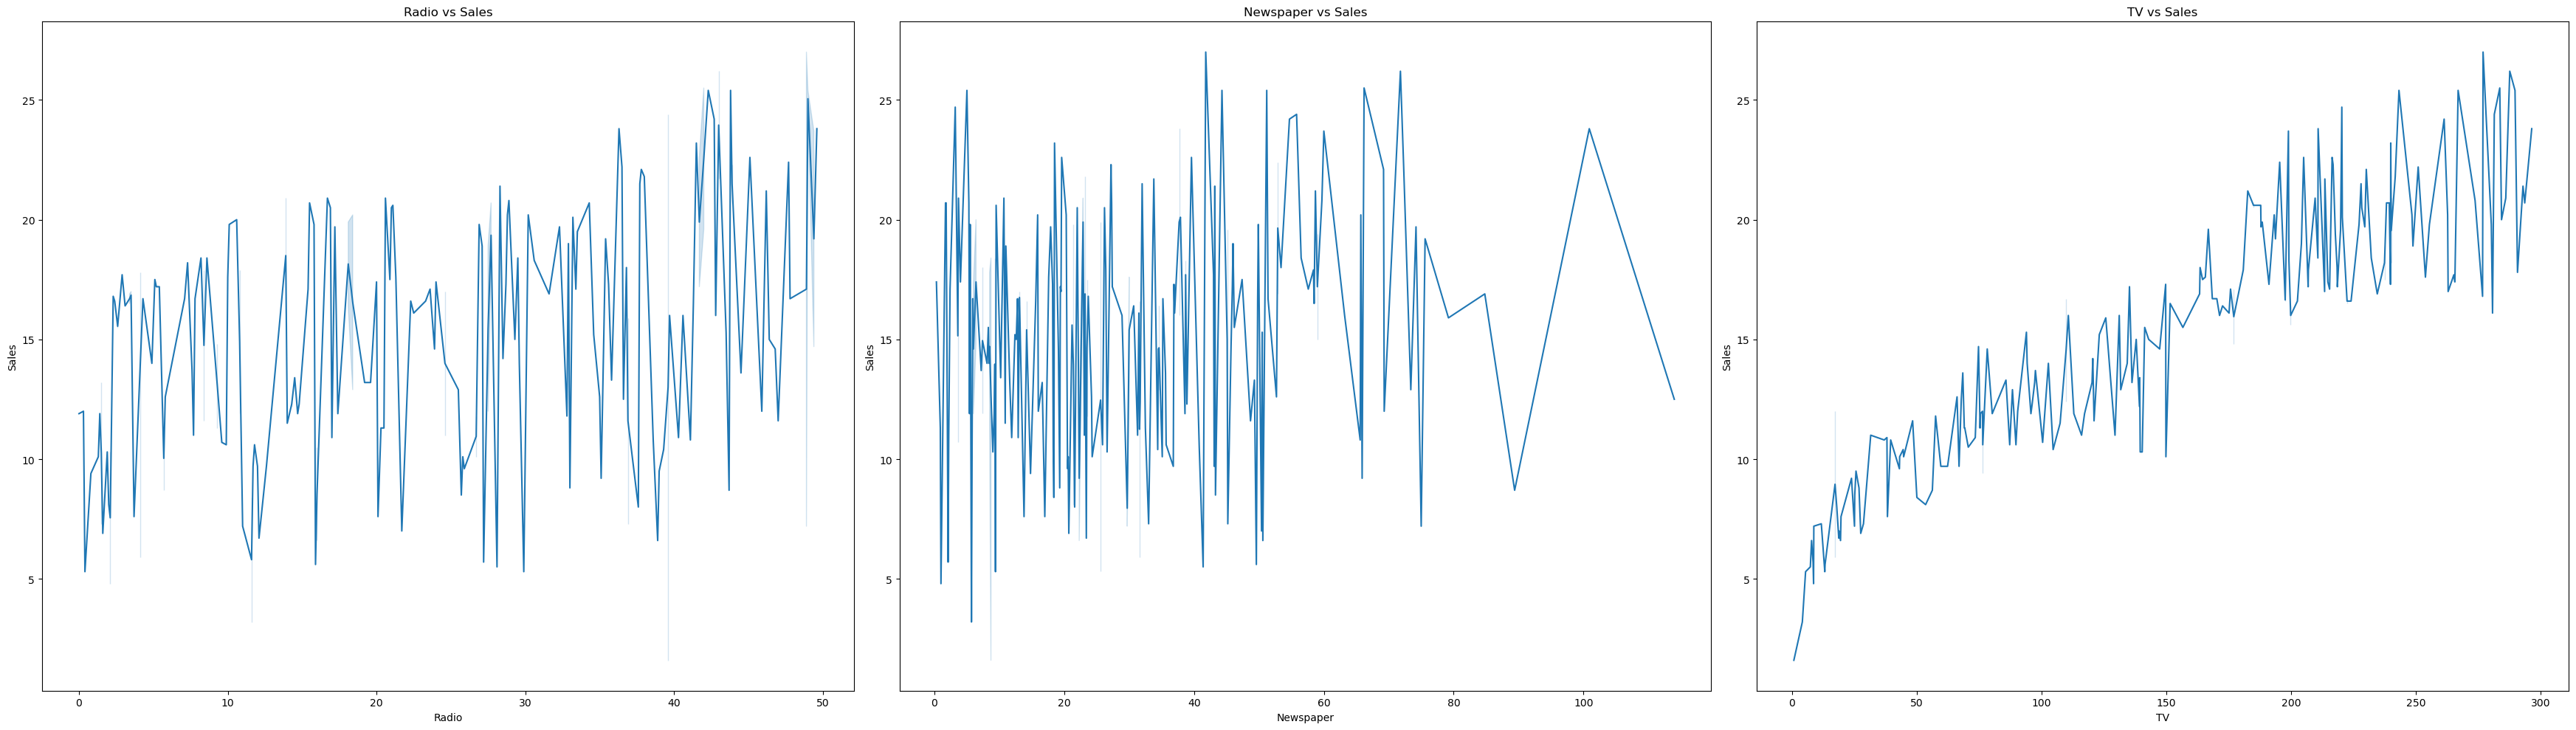

In [151]:
# Create a figure with subplots
plt.figure(figsize=(35, 10))

# Plot 1: Radio vs Sales
plt.subplot(1, 3, 1)
sns.lineplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

# Plot 2: Newspaper vs Sales
plt.subplot(1, 3, 2)
sns.lineplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

# Plot 3: TV vs Sales
plt.subplot(1, 3, 3)
sns.lineplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### Observation
1. The amount which spend on the Tv for increasing the sales performance is doing better over a period of time giving advertising through  TV platform is playing the majority role for increasing the sales ,Upward trend, with sales increasing steadily as the amount of money spent on TV advertising increase

2. The newspaper advertising graph, on the other hand, shows a much more erratic pattern, with sales increasing and decreasing at different times.

3. The Radio advertising graph, on the other hand, also shows a much more erratic pattern, with sales increasing and decreasing at different times,but the sales is getting increase with low budget amount as compared to newspaper

In [152]:
#Handling the missing values 
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

observation
1. There are no missing values in all the features of the data set

## histplot with kde

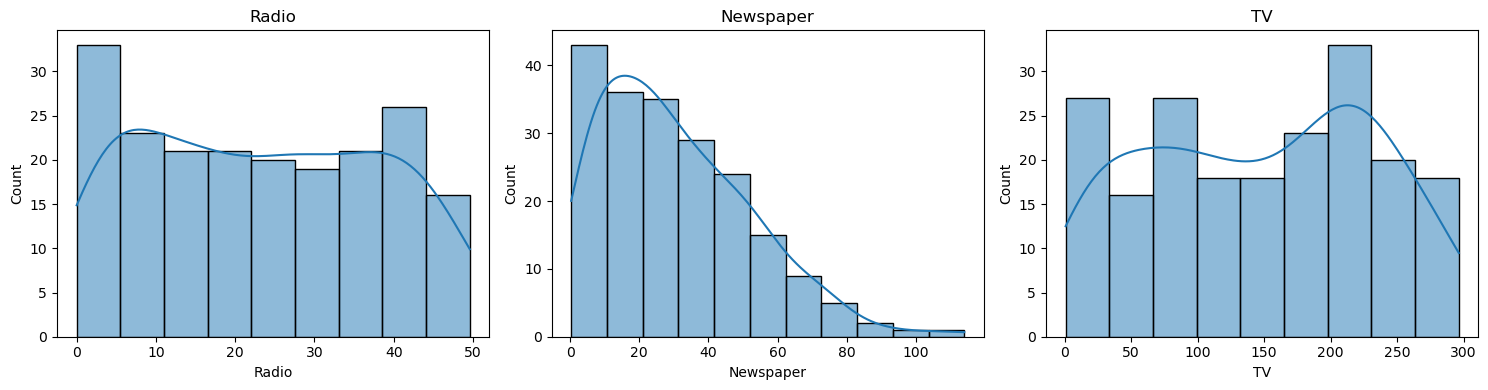

In [153]:

# Create a figure with subplots
plt.figure(figsize=(15, 4))

# Histogram and KDE plot 1: Radio
plt.subplot(1, 3, 1)
sns.histplot(df['Radio'], kde=True)
plt.title('Radio')

# Histogram and KDE plot 2: Newspaper
plt.subplot(1, 3, 2)
sns.histplot(df['Newspaper'], kde=True)
plt.title('Newspaper')

# Histogram and KDE plot 3: TV
plt.subplot(1, 3, 3)
sns.histplot(df['TV'], kde=True)
plt.title('TV')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### Regression plot

Text(0.5, 1.0, 'Regression Plot: TV vs Sales')

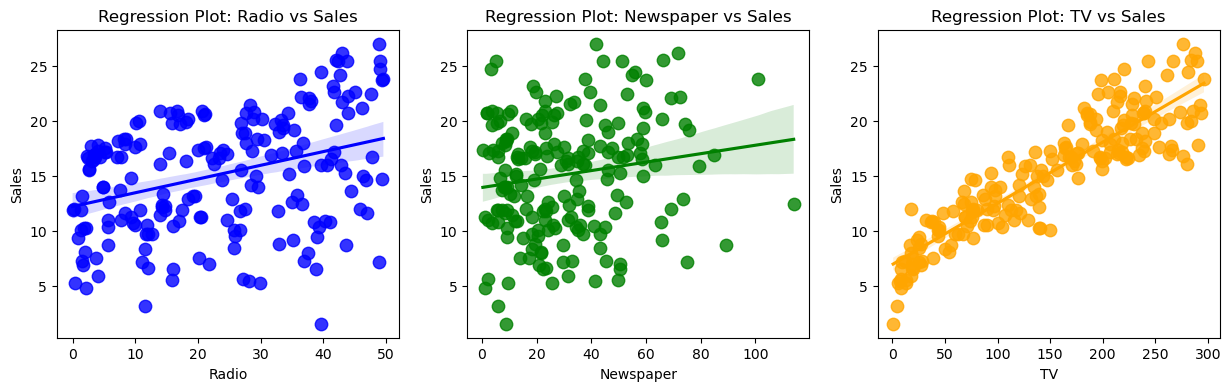

In [154]:
# Create a figure with subplots
plt.figure(figsize=(15, 4))

# Regression plot 1: Radio vs Sales
plt.subplot(1, 3, 1)
sns.regplot(x='Radio', y='Sales', data=df, scatter_kws={'s': 80}, color='blue')
plt.title('Regression Plot: Radio vs Sales')

# Regression plot 2: Newspaper vs Sales
plt.subplot(1, 3, 2)
sns.regplot(x='Newspaper', y='Sales', data=df, scatter_kws={'s': 80}, color='green')
plt.title('Regression Plot: Newspaper vs Sales')

# Regression plot 3: TV vs Sales
plt.subplot(1, 3, 3)
sns.regplot(x='TV', y='Sales', data=df, scatter_kws={'s': 80}, color='orange')
plt.title('Regression Plot: TV vs Sales')


#### Observation

1. The regression plot for radio shows a positive correlation between radio advertising and sales. This means that as the amount of money spent on radio advertising increases, the sales tend to increase as well. However, the correlation is not very strong, so it is not clear how much of an impact radio advertising has on sales.

........

2. The regression plot for newspaper shows a negative correlation between newspaper advertising and sales. This means that as the amount of money spent on newspaper advertising increases, the sales tend to decrease. The correlation is also not very strong, so it is not clear how much of an impact newspaper advertising has on sales.
Because as the money spending increase for advertising the product through newspaper the sales value of the product get decreased thatswhy it is negative correlated 

........

3. The regression plot for TV shows a strong positive correlation between TV advertising and sales. This means that as the amount of money spent on TV advertising increases, the sales tend to increase as well. The correlation is much stronger than the correlation for radio or newspaper advertising, so it is clear that TV advertising has a significant impact on sales.

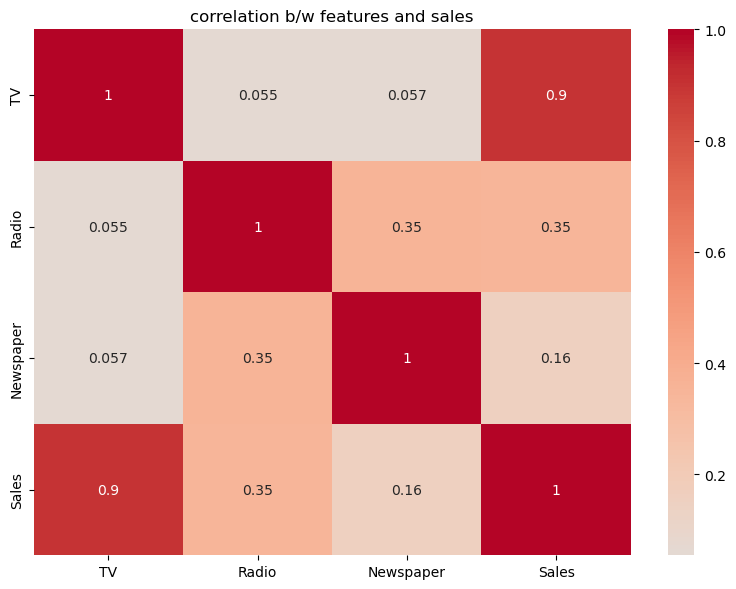

In [155]:
correlation_matrix=df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('correlation b/w features and sales')
plt.tight_layout()

#### observation

1. The heatmap shows that there is a strong positive correlation between TV advertising and sales. This means that as the amount of money spent on TV advertising increases, the sales tend to increase as well. The correlation coefficient for TV advertising vs sales is 0.9, which is a very strong correlation.

.........

2. There is also a moderate positive correlation between radio advertising and sales, but the correlation is not as strong as the correlation for TV advertising. The correlation coefficient for radio advertising vs sales is 0.35, which is a moderate correlation.

........

3. There is a weak positive correlation between newspaper advertising and sales. This means that as the amount of money spent on newspaper advertising increases, the sales tend to decrease slightly. The correlation coefficient for newspaper advertising vs sales is 0.16, which is a weak negative correlation.

In [156]:
## Dropping the Newspaper feature
df.drop('Newspaper',axis=1,inplace=True)



### Feature scalling 
####  Standardization method

In [157]:
standardized_radio=((df['Radio']-df['Radio'].mean())/df['Radio'].std())
standardized_tv =((df['TV']-df['TV'].mean())/df['TV'].std())
df['Radio'] = standardized_radio # replaced those scalled values in the columns of tv and radio
df['TV'] = standardized_tv

Since the data set does not contain outliers and you are using a regression algorithm, standardization is the best feature scaling technique to use. Standardization is less sensitive to outliers than other feature scaling techniques and it is a good choice for regression algorithms.

Here iam performaing the feature scalling because as we can see the correlation between sales vs TV is 0.9 and Sales vs Radio is 0.35 so the TV feature is dominating the Radio feature interms of correlation beacuse 90% of the sales and tv data there is chance in moving same direction and it is 90% indicates the very strong correlation and other one which sales vs radio there is 35%  chance of moving data of sales and radio in same direction 

so the Tv correlation is showing the more domination to the model while its training then that would lead to bias which prediction most probably give based on the Tv feature so for not to put dominating for our model it would better to maintain or scale the tv and radio features to same level 

In [158]:
df.head()

,TV,Radio,Sales
0,0.967425,0.979066,22.1
1,-1.194379,1.080097,10.4
2,-1.512360,1.524637,12.0
3,0.051919,1.214806,16.5
4,0.393196,-0.839507,17.9


### Training the Model

In [159]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [161]:
y_pred=lin_reg.predict(x_test)

In [162]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [163]:
print(mse)
print(rmse)
print(r2)

2.6029121639579906
1.6133543206493701
0.9074206515321912


observation

1. The MSE is 2.6029121639579906. This means that the average squared error between the predicted values and the actual values is 2.6029121639579906.

.........

2. The RMSE is 1.6133543206493701. This means that the average error between the predicted values and the actual values is 1.6133543206493701.

........

3. The R-squared is 0.9074206515321912. This means that 90.74% of the variance in the dependent variable is explained by the independent variables in the linear regression model.

.........

4. In general, a lower MSE, RMSE, and a higher R-squared value indicate a better performing model. So, the linear regression model that you trained is performing w

In [165]:
prediction=lin_reg.predict((np.array([[10,23]])))
prediction # The input data [10, 23] represents the amount of money spent on radio and TV advertising. The predicted sales of 96.99336969 means that the model predicts that if you spend 10 dollars on radio advertising and 23 dollars on TV advertising, you will sell 96.99 products

array([96.99336969])